# Files holen und laden

In [1]:
import time
import csv
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


# Files holen
file_path_A = os.path.join(os.getcwd(), '..','..', 'data/MM_stage3.csv')
file_path_B = os.path.join(os.getcwd(), '..', 'data/stage3.csv')
# Files lesen/laden
df_Mediamarkt = pd.read_csv(file_path_A,
                            encoding='UTF-8')
df_Galaxus = pd.read_csv(file_path_B,
                            encoding='UTF-8')

In [2]:
df_Galaxus.head()

,Preis,Marke,Modell,Speicher,Farbe,Display,Kamera,Mobilfunk,Produkt,Marke_Prozent,Funk_Prozent
0,499.0,Samsung,Galaxy A54 5G,256.0,Awesome Graphite,6.4,50,5G,Samsung Galaxy A54 5G,17.74,59.04
1,399.0,Samsung,Galaxy A53 5G,128.0,Awesome Blue,6.5,64,5G,Samsung Galaxy A53 5G,17.74,59.04
2,333.0,Google,Pixel 6a,128.0,Charcoal,6.1,12.20,5G,Google Pixel 6a,2.15,59.04
3,949.0,Samsung,Galaxy S23,256.0,Green,6.1,50,5G,Samsung Galaxy S23,17.74,59.04
4,769.0,Apple,iPhone 14,128.0,Midnight,6.1,12,5G,Apple iPhone 14,16.29,59.04


In [3]:
df_Mediamarkt.head()

,Url,Med_Preis,Modelname,GTIN,Farbe,Rückkamera_MP,Front_Kamera_MP,Displaygrösse_Inches,Speicherkapazität_GB,Gesichtserkennung,Modelljahr,Marke,Gesamtkundenbewertung,Anzahl_Kundenbewertung,Displaygrösse_CM,Med_Preis_Exkl_Mwst,Kategorie_Farbe
0,https://www.mediamarkt.ch/de/product/_apple-ip...,1100.0,iPhone 14 Pro,MQ0T3ZD/A,Space Black,48.0,12.0,6.1,256.0,1.0,2022.0,apple,4.0,16.0,15.5,1015.0,schwarz
1,https://www.mediamarkt.ch/de/product/_apple-ip...,719.0,iPhone 13,MLPF3ZD/A,Midnight,12.0,12.0,6.1,128.0,1.0,2021.0,apple,4.0,56.0,15.5,664.0,rest
2,https://www.mediamarkt.ch/de/product/_apple-ip...,1125.0,iPhone 14 Pro Max,MQ9P3ZD/A,Space Black,48.0,12.0,6.7,128.0,1.0,2022.0,apple,4.0,8.0,17.0,1038.0,schwarz
3,https://www.mediamarkt.ch/de/product/_apple-ip...,429.0,iPhone 11 (2020),MHDA3ZD/A,Black,12.0,12.0,6.1,64.0,1.0,2020.0,apple,4.0,62.0,15.5,396.0,schwarz
4,https://www.mediamarkt.ch/de/product/_apple-ip...,768.0,iPhone 14,MPUF3ZD/A,Midnight,12.0,12.0,6.1,128.0,1.0,2022.0,apple,4.0,9.0,15.5,709.0,rest


# DataFrames optimieren

## Media Markt

In [4]:
# Bevor wir den Merge machen können, müssen ein Optimierungen auf beiden Datensätzen gemacht werden

In [5]:
# Spaltennamen von den Spalten, die für den Merge relevant sind ändern, so dass sie gleich sind wie die Namen vom Galaxus Datensatz
# Spaltennamen mit Umlaute umbenennen
# Spaltennamen der Spalten, die eindeutig der Webseite zugeteilt werden könenn mit 'Med_' ergänzen (z.B. Gesichterkennung hat auf beiden Seiten für ein Produkt denselben Wert. Preis wiederum wird der Webseite zugetilt und unterscheidet sich vom Preis von Galaxus. Diese müssen nach dem Merge klar erkennbar sein, als Preis von Media Markt)
df_Mediamarkt = df_Mediamarkt.rename(columns={'Url':'Med_Url', 'Displaygrösse_Inches': 'Display', 'Modelname':'Modell', 'Rückkamera_MP': 'Rueckkamera_MP','Speicherkapazität_GB':'Speicher','Displaygrösse_CM':'Display_CM', 'Gesamtkundenbewertung':'Med_Gesamtkundenbewertung', 'Anzahl_Kundenbewertung':'Med_Anzahl_Kundenbewertung', 'Front_Kamera_MP':'Frontkamera'})

In [6]:
#Spalte Marke ist alles klein geschrieben. Im anderen Datensatz ist der erste Buchstaben gross. Das ist ein Problem dann beim merge, da merge case sensitive ist.
#Es ist noch nicht klar, ob wir diese Spalte für den Merge benötigen. hier wird die Spalte angepasst so dass der erste Buchstaben gross geschrieben wird.
df_Mediamarkt['Marke'] = df_Mediamarkt['Marke'].str.title()

In [7]:
df_Mediamarkt.sample(3)

,Med_Url,Med_Preis,Modell,GTIN,Farbe,Rueckkamera_MP,Frontkamera,Display,Speicher,Gesichtserkennung,Modelljahr,Marke,Med_Gesamtkundenbewertung,Med_Anzahl_Kundenbewertung,Display_CM,Med_Preis_Exkl_Mwst,Kategorie_Farbe
360,https://www.mediamarkt.ch/de/product/_oppo-fin...,359.00,Find X3 Neo,5988253,Galactic Silver,50.0,32.0,6.5,256.0,1.0,2021.0,Oppo,0.0,0.0,16.5,331.0,rest
284,https://www.mediamarkt.ch/de/product/_samsung-...,459.95,Galaxy A54 5G,SM-A546BZWCEUE,Awesome White,50.0,32.0,6.4,128.0,0.0,0.0,Samsung,0.0,0.0,16.3,425.0,rest
100,https://www.mediamarkt.ch/de/product/_apple-ip...,469.95,iPhone SE (2022),MMXH3ZD/A,(PRODUCT)RED,12.0,7.0,4.7,64.0,0.0,0.0,Apple,0.0,0.0,11.9,434.0,rest


In [8]:
# Datentyp vom Modelljahr anpassen zu INT. Jahr kann nicht FLOAT sein
df_Mediamarkt['Modelljahr'] = df_Mediamarkt['Modelljahr'].astype(int)

In [9]:
df_Mediamarkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Med_Url                     374 non-null    object 
 1   Med_Preis                   374 non-null    float64
 2   Modell                      374 non-null    object 
 3   GTIN                        374 non-null    object 
 4   Farbe                       374 non-null    object 
 5   Rueckkamera_MP              374 non-null    float64
 6   Frontkamera                 374 non-null    float64
 7   Display                     374 non-null    float64
 8   Speicher                    374 non-null    float64
 9   Gesichtserkennung           374 non-null    float64
 10  Modelljahr                  374 non-null    int64  
 11  Marke                       374 non-null    object 
 12  Med_Gesamtkundenbewertung   374 non-null    float64
 13  Med_Anzahl_Kundenbewertung  374 non

#### Spalten löschen

In [10]:
# Die Produkte können anhand der Spalten Modell, Farbe und Speicher eindeutig identifiziert werden. Diese drei Spalten sind relevant für den Merge.
# Neben diesen Spalten gibt es jedoch noch weitere Spalten, die doppelt vorhanden sind. Diese werden nun hier entfernt

In [11]:
df_Mediamarkt.drop(columns=['Med_Url','Rueckkamera_MP', 'Display', 'Marke','Med_Preis_Exkl_Mwst'], inplace=True, axis=1)


## Galaxus

In [12]:
# nun dasselbe mit Galaxus

In [13]:
#Spalten umbenennen
df_Galaxus = df_Galaxus.rename(columns={'Preis':'Gal_Preis','Kamera':'Rueckkamera', 'Marke_Prozent': 'Gal_Markenanteil', 'Funk_Prozent':'Gal_Mobilfunkanteil', 'Display':'Display_Inches'})

In [14]:
df_Galaxus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gal_Preis            1443 non-null   float64
 1   Marke                1443 non-null   object 
 2   Modell               1443 non-null   object 
 3   Speicher             1443 non-null   float64
 4   Farbe                1443 non-null   object 
 5   Display_Inches       1443 non-null   float64
 6   Rueckkamera          1443 non-null   object 
 7   Mobilfunk            1443 non-null   object 
 8   Produkt              1443 non-null   object 
 9   Gal_Markenanteil     1443 non-null   float64
 10  Gal_Mobilfunkanteil  1443 non-null   float64
dtypes: float64(5), object(6)
memory usage: 124.1+ KB


# Merge

## Versuch 1

In [15]:
# Versuch Nummer 1 von einem Merge anhand von drei Spalten - Modell, Speicher und Farbe.
df_Merged = pd.merge(df_Mediamarkt, df_Galaxus, left_on=['Modell','Speicher','Farbe'], right_on=['Modell','Speicher','Farbe'])

In [16]:
# Leider kein Erfolg
df_Merged.head()

,Med_Preis,Modell,GTIN,Farbe,Frontkamera,Speicher,Gesichtserkennung,Modelljahr,Med_Gesamtkundenbewertung,Med_Anzahl_Kundenbewertung,Display_CM,Kategorie_Farbe,Gal_Preis,Marke,Display_Inches,Rueckkamera,Mobilfunk,Produkt,Gal_Markenanteil,Gal_Mobilfunkanteil


## Versuch 2

In [17]:
# Nun müssen wir herausfinden an welcher Spalte der Merge scheitert. Daher testen wir nun Merge anhand jeder Spalte einzeln durch - Ausschlussprinzip.

#### Merge 'Modell'

In [18]:
df_MergedModell = pd.merge(df_Mediamarkt, df_Galaxus, left_on=['Modell'], right_on=['Modell'])

In [19]:
# Merge anhand der Spalte Modell funktioniert
df_MergedModell.head()

,Med_Preis,Modell,GTIN,Farbe_x,Frontkamera,Speicher_x,Gesichtserkennung,Modelljahr,Med_Gesamtkundenbewertung,Med_Anzahl_Kundenbewertung,...,Gal_Preis,Marke,Speicher_y,Farbe_y,Display_Inches,Rueckkamera,Mobilfunk,Produkt,Gal_Markenanteil,Gal_Mobilfunkanteil
0,1100.0,iPhone 14 Pro,MQ0T3ZD/A,Space Black,12.0,256.0,1.0,2022,4.0,16.0,...,1129.0,Apple,256.0,Space Black,6.1,48,5G,Apple iPhone 14 Pro,16.29,59.04
1,1100.0,iPhone 14 Pro,MQ0T3ZD/A,Space Black,12.0,256.0,1.0,2022,4.0,16.0,...,1125.0,Apple,256.0,Deep Purple,6.1,48,5G,Apple iPhone 14 Pro,16.29,59.04
2,1100.0,iPhone 14 Pro,MQ0T3ZD/A,Space Black,12.0,256.0,1.0,2022,4.0,16.0,...,1029.0,Apple,128.0,Deep Purple,6.1,48,5G,Apple iPhone 14 Pro,16.29,59.04
3,1100.0,iPhone 14 Pro,MQ0T3ZD/A,Space Black,12.0,256.0,1.0,2022,4.0,16.0,...,1125.0,Apple,256.0,Silver,6.1,48,5G,Apple iPhone 14 Pro,16.29,59.04
4,1100.0,iPhone 14 Pro,MQ0T3ZD/A,Space Black,12.0,256.0,1.0,2022,4.0,16.0,...,1029.0,Apple,128.0,Silver,6.1,48,5G,Apple iPhone 14 Pro,16.29,59.04


#### Merge 'Speicher'

In [20]:
df_MergedSpeicher = pd.merge(df_Mediamarkt, df_Galaxus, left_on=['Speicher'], right_on=['Speicher'])

In [21]:
# Merge anhand der Spalte Speicher funktioniert. Somit könnte es nur noch die Spalte Farbe sein. Testen wir dies mal.
df_MergedSpeicher.head()

,Med_Preis,Modell_x,GTIN,Farbe_x,Frontkamera,Speicher,Gesichtserkennung,Modelljahr,Med_Gesamtkundenbewertung,Med_Anzahl_Kundenbewertung,...,Gal_Preis,Marke,Modell_y,Farbe_y,Display_Inches,Rueckkamera,Mobilfunk,Produkt,Gal_Markenanteil,Gal_Mobilfunkanteil
0,1100.0,iPhone 14 Pro,MQ0T3ZD/A,Space Black,12.0,256.0,1.0,2022,4.0,16.0,...,499.0,Samsung,Galaxy A54 5G,Awesome Graphite,6.4,50,5G,Samsung Galaxy A54 5G,17.74,59.04
1,1100.0,iPhone 14 Pro,MQ0T3ZD/A,Space Black,12.0,256.0,1.0,2022,4.0,16.0,...,949.0,Samsung,Galaxy S23,Green,6.1,50,5G,Samsung Galaxy S23,17.74,59.04
2,1100.0,iPhone 14 Pro,MQ0T3ZD/A,Space Black,12.0,256.0,1.0,2022,4.0,16.0,...,1129.0,Apple,iPhone 14 Pro,Space Black,6.1,48,5G,Apple iPhone 14 Pro,16.29,59.04
3,1100.0,iPhone 14 Pro,MQ0T3ZD/A,Space Black,12.0,256.0,1.0,2022,4.0,16.0,...,949.0,Samsung,Galaxy S23,Phantom Black,6.1,50,5G,Samsung Galaxy S23,17.74,59.04
4,1100.0,iPhone 14 Pro,MQ0T3ZD/A,Space Black,12.0,256.0,1.0,2022,4.0,16.0,...,949.0,Samsung,Galaxy S23,Lavender,6.1,50,5G,Samsung Galaxy S23,17.74,59.04


#### Merge 'Farbe'

In [22]:
df_MergedFarbe = pd.merge(df_Mediamarkt, df_Galaxus, left_on=['Farbe'], right_on=['Farbe'])

In [23]:
# Nicht erfolgreich. Somit haben wir ein Problem mit der Spalte Farbe.
df_MergedFarbe.head()

,Med_Preis,Modell_x,GTIN,Farbe,Frontkamera,Speicher_x,Gesichtserkennung,Modelljahr,Med_Gesamtkundenbewertung,Med_Anzahl_Kundenbewertung,...,Gal_Preis,Marke,Modell_y,Speicher_y,Display_Inches,Rueckkamera,Mobilfunk,Produkt,Gal_Markenanteil,Gal_Mobilfunkanteil


In [24]:
# Evtl. haben wir ein Problem mit dem Datentyp. Ändern wir mal den Datentyp zu String (wenn nicht schon der Fall).

In [25]:
print(df_Mediamarkt['Farbe'].dtype)

object


In [26]:
print(df_Galaxus['Farbe'].dtype)

object


In [27]:
df_Galaxus['Farbe'] = df_Galaxus['Farbe'].astype(str)

In [28]:
df_Mediamarkt['Farbe'] = df_Mediamarkt['Farbe'].astype(str)

In [29]:
df_Merged2 = pd.merge(df_Mediamarkt, df_Galaxus, left_on=['Modell','Speicher','Farbe'], right_on=['Modell','Speicher','Farbe'])

In [30]:
# auch kein Erfolg
df_Merged2.head()

,Med_Preis,Modell,GTIN,Farbe,Frontkamera,Speicher,Gesichtserkennung,Modelljahr,Med_Gesamtkundenbewertung,Med_Anzahl_Kundenbewertung,Display_CM,Kategorie_Farbe,Gal_Preis,Marke,Display_Inches,Rueckkamera,Mobilfunk,Produkt,Gal_Markenanteil,Gal_Mobilfunkanteil


## Versuch 3

In [31]:
# Was wenn Leerschläge bestehen, die den Match zwischen beiden Spalten verunmöglichen. Ersetzen wir mal alle Leerschläge.

In [32]:
df_Galaxus['Farbe'] = df_Galaxus['Farbe'].str.replace(' ', '')
df_Mediamarkt['Farbe'] = df_Mediamarkt['Farbe'].str.replace(' ', '')

In [33]:
df_Merged3 = pd.merge(df_Mediamarkt, df_Galaxus, left_on=['Modell','Speicher','Farbe'], right_on=['Modell','Speicher','Farbe'])

In [34]:
# Merge ist erfolgreich!!!
df_Merged3.head()
df_Merged3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Med_Preis                   208 non-null    float64
 1   Modell                      208 non-null    object 
 2   GTIN                        208 non-null    object 
 3   Farbe                       208 non-null    object 
 4   Frontkamera                 208 non-null    float64
 5   Speicher                    208 non-null    float64
 6   Gesichtserkennung           208 non-null    float64
 7   Modelljahr                  208 non-null    int64  
 8   Med_Gesamtkundenbewertung   208 non-null    float64
 9   Med_Anzahl_Kundenbewertung  208 non-null    float64
 10  Display_CM                  208 non-null    float64
 11  Kategorie_Farbe             208 non-null    object 
 12  Gal_Preis                   208 non-null    float64
 13  Marke                       208 non

# Tabelle modifizieren

In [35]:
# Reihenfolge der Spalten anpassen, so dass die Informationen nach Wichtigkeit geordnet sind und Daten wie Preise nebeneinander aufgelistet werden
df_Merged3 = df_Merged3[['GTIN',
                         'Marke',
                         'Modell',
                         'Farbe',
                         'Speicher',
                         'Display_Inches',
                         'Display_CM',
                         'Mobilfunk',
                         'Rueckkamera',
                         'Frontkamera',
                         'Modelljahr',
                         'Gesichtserkennung',
                         'Produkt',
                         'Kategorie_Farbe',
                         'Med_Preis',
                         'Gal_Preis',
                         'Med_Gesamtkundenbewertung',
                         'Med_Anzahl_Kundenbewertung',
                         'Gal_Markenanteil',
                         'Gal_Mobilfunkanteil'
                        ]]

In [36]:
df_Merged3.head()

,GTIN,Marke,Modell,Farbe,Speicher,Display_Inches,Display_CM,Mobilfunk,Rueckkamera,Frontkamera,Modelljahr,Gesichtserkennung,Produkt,Kategorie_Farbe,Med_Preis,Gal_Preis,Med_Gesamtkundenbewertung,Med_Anzahl_Kundenbewertung,Gal_Markenanteil,Gal_Mobilfunkanteil
0,MQ0T3ZD/A,Apple,iPhone 14 Pro,SpaceBlack,256.0,6.1,15.5,5G,48,12.0,2022,1.0,Apple iPhone 14 Pro,schwarz,1100.0,1129.0,4.0,16.0,16.29,59.04
1,MLPF3ZD/A,Apple,iPhone 13,Midnight,128.0,6.1,15.5,5G,12,12.0,2021,1.0,Apple iPhone 13,rest,719.0,726.0,4.0,56.0,16.29,59.04
2,MQ9P3ZD/A,Apple,iPhone 14 Pro Max,SpaceBlack,128.0,6.7,17.0,5G,48,12.0,2022,1.0,Apple iPhone 14 Pro Max,schwarz,1125.0,1100.0,4.0,8.0,16.29,59.04
3,MPUF3ZD/A,Apple,iPhone 14,Midnight,128.0,6.1,15.5,5G,12,12.0,2022,1.0,Apple iPhone 14,rest,768.0,769.0,4.0,9.0,16.29,59.04
4,MQ1F3ZD/A,Apple,iPhone 14 Pro,DeepPurple,256.0,6.1,15.5,5G,48,12.0,2022,1.0,Apple iPhone 14 Pro,rest,1132.0,1125.0,4.0,16.0,16.29,59.04


In [37]:
# GTIN ist eindeutig - somit geeignet als Primary Key. GTIN zu Primary Key/Index ändern
df_Merged3.set_index('GTIN', inplace = True)

In [38]:
# Nun ergänzen wir die Tabelle mit der Spalte 'Preisdifferenz'. Diesen Wert werden wir für die Beantwortung der Fragen benötigen.
df_Merged3['Preisdifferenz'] = df_Merged3['Gal_Preis'] - df_Merged3['Med_Preis']

### Export

In [39]:
# exportieren in ein CSV
file_path = os.path.join(os.getcwd(), '..', 'data/merged.csv')
df_Merged3.to_csv(file_path, index=False)

In [40]:
df_Merged3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, MQ0T3ZD/A to GA03923-GB
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Marke                       208 non-null    object 
 1   Modell                      208 non-null    object 
 2   Farbe                       208 non-null    object 
 3   Speicher                    208 non-null    float64
 4   Display_Inches              208 non-null    float64
 5   Display_CM                  208 non-null    float64
 6   Mobilfunk                   208 non-null    object 
 7   Rueckkamera                 208 non-null    object 
 8   Frontkamera                 208 non-null    float64
 9   Modelljahr                  208 non-null    int64  
 10  Gesichtserkennung           208 non-null    float64
 11  Produkt                     208 non-null    object 
 12  Kategorie_Farbe             208 non-null    object 
 13  Med_Preis                

# Visualisierung

In [41]:
# Fragen 2 & 3 beantworten

#### Wie hoch ist die Wahrscheintlichkeit, dass ein Produkt bei Galaxus im Vergleich zu Media Markt günstiger ist?

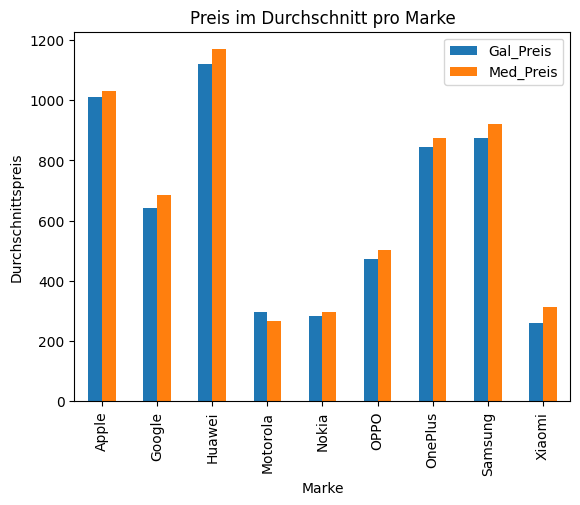

In [42]:
# hier werden der Durchschnittspreis pro Marke von beiden Seiten einander gegenübergestellt.
# Wir können hier rauslesen, dass generell Media Markt höhere Preise hat als Galaxus.
mean_prices = df_Merged3.groupby('Marke')[['Gal_Preis','Med_Preis']].mean()
fig, ax = plt.subplots()
mean_prices.plot(kind='bar', ax=ax)
ax.set_xlabel('Marke')
ax.set_ylabel('Durchschnittspreis')
ax.set_title('Preis im Durchschnitt pro Marke')
plt.show()

In [43]:
# Wir haben vorhin die Preisdifferenz pro Zeile berechnet. Hier werden wir die Preisdifferenz visualisieren.


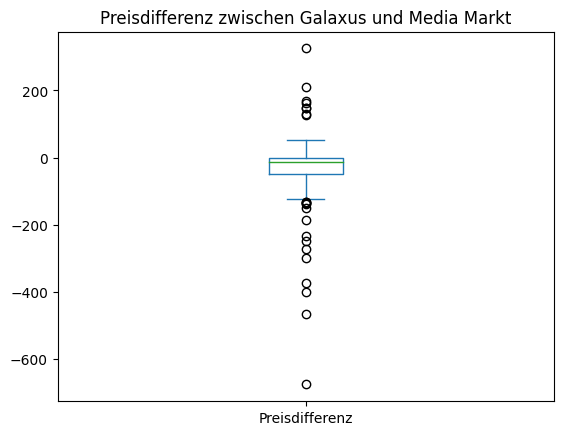

Median: -13.379999999999988
1. Quartil: -50.0
3. Quartil: 0.0
Interquartilsabstand: 50.0
Untere Grenze: -125.0
Obere Grenze: 75.0


In [44]:
df_Merged3['Preisdifferenz'].plot.box()
plt.title('Preisdifferenz zwischen Galaxus und Media Markt')
plt.show()

# Jetzt berechnen wir die Werte noch zusätzlich
median = np.median(df_Merged3['Preisdifferenz'])
q1 = np.percentile(df_Merged3['Preisdifferenz'], 25)
q3 = np.percentile(df_Merged3['Preisdifferenz'], 75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
print('Median:', median)
print('1. Quartil:',q1)
print('3. Quartil:',q3)
print('Interquartilsabstand:', iqr)
print('Untere Grenze:', lower_fence)
print('Obere Grenze:', upper_fence)

In [45]:
# Interpretation Preisdifferenz:
# Der Median-Wert beträgt -13.38. Das heisst Hälfte der Preisdifferenz liegt unter -13.3. Die ander Hälfte ist grösser. Somit sind 50% der Preise mehr als 13.30 Franken günstiger sind bei Galaxus. 
# 25% der Preisunterschiede liegt unter -50. 75% ist grösser. 25% der Produkte sind bei Galaxus um 50.- günstiger als bei Media Markt.
# 75% der Preisunterschiede liegen unter 0. Somit sind 75% der Produkte bei Galaxus günstiger als bei Media Markt.
# Dabei dürfen wir die Ausreisser nicht vergessen. Die untere Aussreissergrenze liegt bei -125. Alles darunter sind potenzielle Ausreisser.
# Nach oben liegt die Grenze bei 75.-

In [46]:
# Schauen wir mal die Ausreisser an

df_Merged3[df_Merged3["Preisdifferenz"] < -125]

,Marke,Modell,Farbe,Speicher,Display_Inches,Display_CM,Mobilfunk,Rueckkamera,Frontkamera,Modelljahr,Gesichtserkennung,Produkt,Kategorie_Farbe,Med_Preis,Gal_Preis,Med_Gesamtkundenbewertung,Med_Anzahl_Kundenbewertung,Gal_Markenanteil,Gal_Mobilfunkanteil,Preisdifferenz
GTIN,,,,,,,,,,,,,,,,,,,,
MPX33ZD/A,Apple,iPhone 14,Starlight,512.0,6.10,15.5,5G,12,12.0,2022,1.0,Apple iPhone 14,rest,1269.00,1135.00,0.0,0.0,16.29,59.04,-134.00
MPWW3ZD/A,Apple,iPhone 14,Midnight,512.0,6.10,15.5,5G,12,12.0,2022,1.0,Apple iPhone 14,rest,1269.00,1134.00,0.0,0.0,16.29,59.04,-135.00
SM-F721BLVGEUE,Samsung,Galaxy Z Flip4,BoraPurple,128.0,6.70,17.0,5G,12,10.0,2022,1.0,Samsung Galaxy Z Flip4,rest,999.00,862.17,4.0,16.0,17.74,59.04,-136.83
SM-F721BZAGEUE,Samsung,Galaxy Z Flip4,Graphite,128.0,6.70,17.0,5G,12,10.0,2022,1.0,Samsung Galaxy Z Flip4,rest,999.00,699.75,4.0,15.0,17.74,59.04,-299.25
MPXN3ZD/A,Apple,iPhone 14,Blue,512.0,6.10,15.5,5G,12,12.0,2022,1.0,Apple iPhone 14,rest,1269.00,1138.00,0.0,0.0,16.29,59.04,-131.00
MZB0DBIEU,Xiaomi,13 Pro,CeramicBlack,256.0,6.73,17.1,5G,50,32.0,2023,1.0,Xiaomi 13 Pro,weiss,1399.00,1126.00,5.0,2.0,22.18,59.04,-273.00
PAU70018IT,Motorola,Moto G52,CharcoalGrey,128.0,6.60,16.8,4G,50,16.0,2022,1.0,Motorola Moto G52,rest,329.95,181.41,0.0,0.0,8.94,39.02,-148.54
MLKD3ZD/A,Apple,iPhone 13 mini,Pink,512.0,5.40,13.7,5G,12,12.0,2021,1.0,Apple iPhone 13 mini,rest,999.00,867.00,5.0,2.0,16.29,59.04,-132.00
MLQC3ZD/A,Apple,iPhone 13,Midnight,512.0,6.10,15.5,5G,12,12.0,2021,1.0,Apple iPhone 13,rest,1139.00,905.00,5.0,1.0,16.29,59.04,-234.00


In [47]:
# bei Verifizierung mit der Webseite, scheint es bei Galaxus teilweise Rabatte zu geben auf gewisse Modelle, daher gibt es einen so grossen Preisunterschied.

In [48]:
# Schauen wir mal die Ausreisser nach oben an an

df_Merged3[df_Merged3["Preisdifferenz"] > 75]

,Marke,Modell,Farbe,Speicher,Display_Inches,Display_CM,Mobilfunk,Rueckkamera,Frontkamera,Modelljahr,Gesichtserkennung,Produkt,Kategorie_Farbe,Med_Preis,Gal_Preis,Med_Gesamtkundenbewertung,Med_Anzahl_Kundenbewertung,Gal_Markenanteil,Gal_Mobilfunkanteil,Preisdifferenz
GTIN,,,,,,,,,,,,,,,,,,,,
MQ293ZD/A,Apple,iPhone 14 Pro,DeepPurple,512.0,6.1,15.5,5G,48,12.0,2022,1.0,Apple iPhone 14 Pro,rest,1439.0,1587.35,5.0,1.0,16.29,59.04,148.35
PALM0002FR,Motorola,Moto G 5G,FrostedSilver,64.0,6.7,17.0,5G,48,16.0,2020,1.0,Motorola Moto G 5G,rest,239.0,368.00,0.0,0.0,8.94,59.04,129.00
MQAJ3ZD/A,Apple,iPhone 14 Pro Max,Gold,512.0,6.7,17.0,5G,48,12.0,2022,1.0,Apple iPhone 14 Pro Max,schwarz,1559.0,1707.45,5.0,1.0,16.29,59.04,148.45
MQ2G3ZD/A,Apple,iPhone 14 Pro,SpaceBlack,1000.0,6.1,15.5,5G,48,12.0,2022,1.0,Apple iPhone 14 Pro,rest,1679.0,1840.55,5.0,2.0,16.29,59.04,161.55
MQ233ZD/A,Apple,iPhone 14 Pro,Gold,512.0,6.1,15.5,5G,48,12.0,2022,1.0,Apple iPhone 14 Pro,rest,1406.0,1574.81,0.0,0.0,16.29,59.04,168.81
PALM0016IS,Motorola,Moto G 5G,VolcanicGrey,64.0,6.7,17.0,5G,48,16.0,2020,1.0,Motorola Moto G 5G,rest,239.0,448.00,0.0,0.0,8.94,59.04,209.00
PANY0039SE,Motorola,Edge 20 Pro,BlueVeganLeather,256.0,6.7,17.0,5G,108,32.0,2021,1.0,Motorola Edge 20 Pro,rest,529.0,656.00,0.0,0.0,8.94,59.04,127.00
5988253,OPPO,Find X3 Neo,GalacticSilver,256.0,6.5,16.5,5G,50,32.0,2021,1.0,OPPO Find X3 Neo,rest,359.0,684.00,0.0,0.0,6.31,59.04,325.00


In [49]:
# rückwirkend können wir nicht sagen, was sich hier an den Preisen geändert hat. Diese Preise sind nicht die aktuellen Preise.

##### Wahrscheinlichkeit

In [50]:
# Hier berechnen wir nun die Wahrscheinlichkeit, dass der Wert in der Spalte Gal_Preis kleiner ist als der Spalte Med_Preis
prob_gal = (df_Merged3['Gal_Preis'] < df_Merged3['Med_Preis']).mean()
print (f"Die Wahrscheinlichkeit, dass ein Produkt bei Galaxus günstiger ist als bei Media Markt beträgt {prob_gal:.2%}")

Die Wahrscheinlichkeit, dass ein Produkt bei Galaxus günstiger ist als bei Media Markt beträgt 64.42%


##### Visualisierung Wahrscheinlichkeit

In [51]:
# Wahrscheinlichkeit, dass ein Produkt bei Media Markt günstiger ist
prob_med = 1 - prob_gal

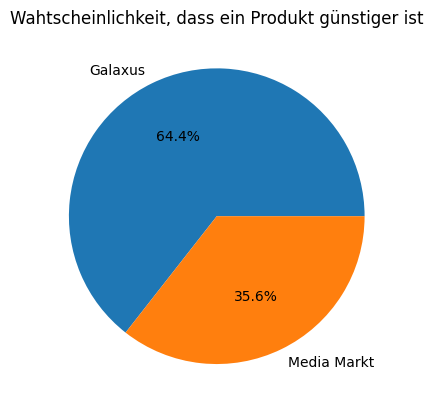

In [52]:
labels = ['Galaxus', 'Media Markt']
prob = [prob_gal, prob_med]
plt.pie(prob, labels = labels, autopct='%1.1f%%')
plt.title('Wahtscheinlichkeit, dass ein Produkt günstiger ist')
plt.show()

#### Gibt es eine Korrelation zwischen der Marke und der Gesamsternebewertung?

In [53]:
# Als erstes erstellen wir ein neues Dataframe mit nur den zwei notwendigen Spalten. Die Index Spalte löschen wir.
df_Merged_corr = df_Merged3[['Marke','Med_Gesamtkundenbewertung']].reset_index(drop=True)

In [54]:
# löschen wir alle NAs raus.
df_Merged_corr = df_Merged_corr.dropna(subset=['Marke'])
df_Merged_corr = df_Merged_corr.dropna(subset=['Med_Gesamtkundenbewertung'])

In [55]:
#df_Merged_corr = df_Merged_corr[np.isfinite(df_Merged_corr['Med_Gesamtkundenbewertung'])]

In [56]:
# Für die Berechnung der Korrelation benötigen wir zwei numerische Variabeln.
# Variable Marke in numerische Werte 0-8 konvertieren
df_Merged_corr['Marke'] = df_Merged_corr['Marke'].map({'Samsung': 0, 'Apple': 1, 'Huawei': 2, 'Xiaomi': 3, 'Google': 4, 'Nokia': 5, 'OnePlus': 6, 'OPPO': 7, 'Motorola':8})
# Point Biserial Korrelation berechnen
corr, p_value = stats.pointbiserialr(df_Merged_corr['Marke'], df_Merged_corr['Med_Gesamtkundenbewertung'])

In [57]:
print('Point Biserial Correlation Coefficient:', corr)
print('P-value:', p_value)

Point Biserial Correlation Coefficient: -0.3312962413446292
P-value: 1.0187958823579163e-06


In [58]:
# Als erstes haben wir die Marken in numerische Werte 0-8 geändert.
# 0 steht bei uns für Samsung, eine der bekanntesten Marken, während die letzte Zahl 8 für eine eher weniger bekannte Mark O steht.
# Somit wäre unsere Vermutung, dass hier eine negative Beziehung besteht.
# Mit der steigenden Zahl, die für die Marke steht, wird die Bewertung unserer Meinung nach schlechter.

# Im Allgemeinen heisst es, wenn der Koeffizient näher bei -1 ist, deutet dies auf eine starke negative Beziehung hin.
# Wichtig zu beachten in unserem Fall ist, dass der Koeffizient zwar im negativen Bereich, jedoch näher bei 0 als bei -1.
# Der Korrelationskoeffizient von -0.3312962413446292 zeigt eine mässig negative Korrelation zwischen den Variablen 'Marke' und 'Med_Gesamtkundenbewertung' an.
# Das bedeutet, dass tendenziell niedrigere Bewertungen bei verschiedenen Marken vorliegen.

# P-Value ist in unserem Fall sehr klein. Dieser Wert legt nahe, dass die beobachtete negative Korrelation sehr unwahrscheinlich nur durch Zufall entstanden ist.
# Die Nullhypothese, dass keine Korrelation zwischen der Marke und Bewrtung wird hiermit abgelehnt.
# P-Value weist auf eine statisch signifikante Korrelation zwischen den Variabeln hin.

# Unsere Schlussfolgerung basierend auf diesen zwei Werten wäre, dass zwischen den Variablen eine statistisch signifikante
# mässig negative Korrelation besteht. Das bedeutet, dass unterschiedliche Marken tendenziell unterschiedliche Bewerungen aufweisen, wobei bestimmte Marken mit niedrigeren Bewertungen in Verbindung gebracht werden können.
# Die weniger bekannten Marken können mit schlechteren Bewertungen in Verbindung gebracht werden.
# Je bekannter die Marke, umso bessere Bewertung.

# Was wir aber hier nicht aus den Augen verlieren dürfen ist, dass dieser Koeffizient und P-Wert stark von der Reihenfolge der erfassten Marken abhängt.
# Wenn wir die Reihenfolge abändern, ändern sicht auch der Wert. 

# Die Abbildung weiter unten zeigt die Verteilung der Bewertungen von jeder Marke. Anhand dieser Abbildung hat Apple die beste Bewertungen. Neben Apple hat OnePlus sehr gute Bewertungen.
# Sowohl bei der Berechnung des Koeffizienten wie auch bei der Abbildung wurde nicht beachtet wie viele Bewertungen pro Marke vorhanden sind.
# Wenn OnePlus nur zwei Bewertungen hat, aber dafür zwei sehr gute, kann man diese mit einer anderen Marke mit 100 Bewertungen vergleichen?

# Grundsätzlich gibt es Hinweise auf eine Korrelation.

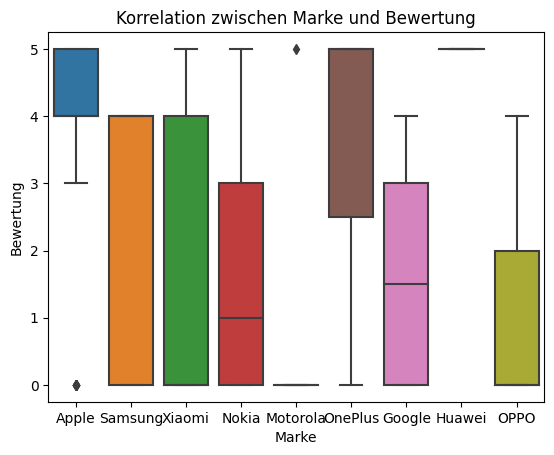

In [59]:
sns.boxplot(data=df_Merged3, x='Marke', y='Med_Gesamtkundenbewertung')
plt.xlabel('Marke')
plt.ylabel('Bewertung')
plt.title('Korrelation zwischen Marke und Bewertung')
plt.show()